In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn import preprocessing
from math import radians, cos, sin, asin, sqrt
%matplotlib inline

df = pd.read_csv('/Users/jasongangel/Downloads/AIS/data/304010886Combined.csv',usecols=['MMSI','PERIOD', 'LAT', 'LON','SPEED_KNOTS', 'COG_DEG'], parse_dates=['PERIOD'])
df.head()

,MMSI,PERIOD,LAT,LON,SPEED_KNOTS,COG_DEG
0,304010886,2017-01-08 00:05:00,8.708393,-59.273870,15.1,299
1,304010886,2017-01-08 00:10:00,8.716595,-59.287730,15.1,302
2,304010886,2017-01-08 00:40:00,8.778348,-59.389675,15.2,299
3,304010886,2017-01-08 00:45:00,8.789870,-59.407516,15.0,304
4,304010886,2017-01-08 01:10:00,8.857926,-59.512920,15.1,301


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40536 entries, 0 to 40535
Data columns (total 6 columns):
MMSI           40536 non-null int64
PERIOD         40536 non-null datetime64[ns]
LAT            40536 non-null float64
LON            40536 non-null float64
SPEED_KNOTS    40536 non-null float64
COG_DEG        40536 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.9 MB


In [4]:
df.describe(include='all')

,MMSI,PERIOD,LAT,LON,SPEED_KNOTS,COG_DEG
count,40536.0,40536,40536.000000,40536.000000,40536.000000,40536.000000
unique,NaN,40536,NaN,NaN,NaN,NaN
top,NaN,2017-05-13 14:15:00,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN
first,NaN,2016-01-08 16:50:00,NaN,NaN,NaN,NaN
last,NaN,2018-01-07 00:55:00,NaN,NaN,NaN,NaN
mean,304010886.0,NaN,16.095483,-75.413379,6.247496,219.019760
std,0.0,NaN,9.001522,14.165983,6.324303,91.626598
min,304010886.0,NaN,-18.474384,-97.884820,0.000000,0.000000
25%,304010886.0,NaN,10.406163,-94.557290,0.000000,131.000000


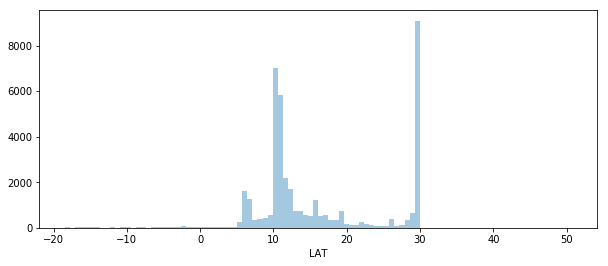

In [5]:
#LAT Hist
plt.figure(figsize=(10,4))
sns.distplot(df['LAT'],kde=False,bins=100)

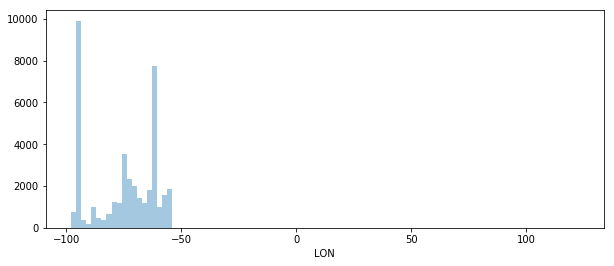

In [6]:
#LON Hist
plt.figure(figsize=(10,4))
sns.distplot(df['LON'],kde=False,bins=100)

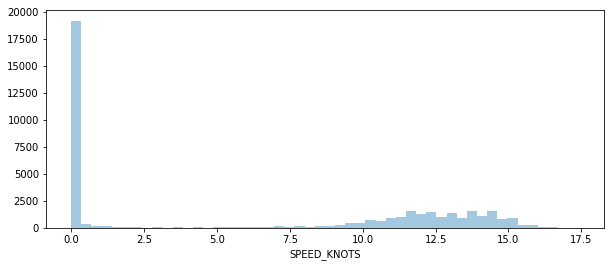

In [7]:
#SPEED_KNOTs Hist
plt.figure(figsize=(10,4))
sns.distplot(df['SPEED_KNOTS'],kde=False,bins=50)

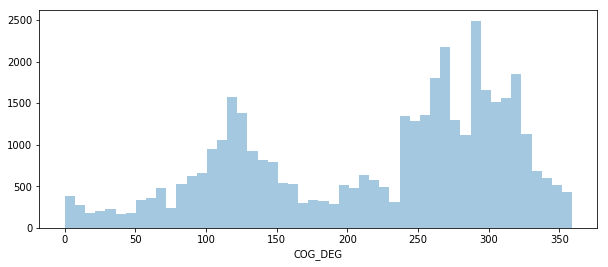

In [8]:
#COG_DEG Hist
plt.figure(figsize=(10,4))
sns.distplot(df['COG_DEG'],kde=False,bins=50)

# PRE_PROCESS

In [9]:
#CONVERT PERIOD TO UNIX
df['UNX'] = df['PERIOD'].astype('int64')//10**9
df = df[['MMSI', 'PERIOD', 'UNX','LAT','LON','SPEED_KNOTS','COG_DEG']]
df = df.drop(['PERIOD','MMSI'], axis=1)

In [10]:
#Standardize Continuous Columns
import scipy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['SPEED_KNOTS','COG_DEG']] = scaler.fit_transform(df[['SPEED_KNOTS','COG_DEG']])

Lat long coordinates have a problem that they are 2 features that represent a three dimensional space. This means that the long coordinate goes all around, which means the two most extreme values are actually very close together. I've dealt with this problem a few times and what I do in this case is map them to x, y and z coordinates. This means close points in these 3 dimensions are also close in reality. Depending on the use case you can disregard the changes in height and map them to a perfect sphere. These features can then be standardized properly.

x = cos(lat) * cos(lon)
y = cos(lat) * sin(lon)
z = sin(lat) 

In [11]:
from math import radians, cos, sin

def XYZ(lon, lat):
    
    # convert decimal degrees to radians 
    lon, lat = map(radians, [lon, lat])

    x = cos(lat) * cos(lon)
    y = cos(lat) * sin(lon) 
    z = sin(lat)
    
    return x, y, z

In [12]:
XYZ(19.562738,-92.593254)

(-0.04263359884808652, -0.015149906767049358, -0.9989759039006948)

In [13]:
df.head()

,UNX,LAT,LON,SPEED_KNOTS,COG_DEG
0,1483833900,8.708393,-59.273870,1.399777,0.872904
1,1483834200,8.716595,-59.287730,1.399777,0.905646
2,1483836000,8.778348,-59.389675,1.415589,0.872904
3,1483836300,8.789870,-59.407516,1.383965,0.927474
4,1483837800,8.857926,-59.512920,1.399777,0.894732
